This is a jupyter notebook file for Linear Regression model for predicting Transportation/shipping costs of a unit

Inputs: SKU, Lead times, Order quantities, Shipping carriers, Location, Routes, Defect rates, Transportation modes, Supplier name, Shipping times, Defect rates

Output: Shipping costs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import pickle

In [3]:
data = pd.read_csv(r'C:\Users\omgha\OneDrive\Documents\GitHub\SupplyChainManagement\data\sample\supply_chain_data_processed_1.csv')

In [4]:
data['Lead times']=data['Lead times'].astype(int)
data['Shipping times']= data['Shipping times'].astype(int)
data['Lead time']= data['Lead time'].astype(int)
data['Manufacturing lead time']= data['Manufacturing lead time'].astype(int)

In [5]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [72]:
x = data[['SKU', 'Lead times', 'Order quantities','Shipping carriers', 'Location','Routes','Defect rates',
       'Transportation modes', 'Supplier name', 'Shipping times', 'Inspection results']]
y = data[['Shipping costs']]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [91]:
scaler = StandardScaler()# Scale the data 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [92]:
# Train a linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [93]:
# Evaluate the model on the testing set
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -0.05463942831542634


In [94]:
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.2535706017004884


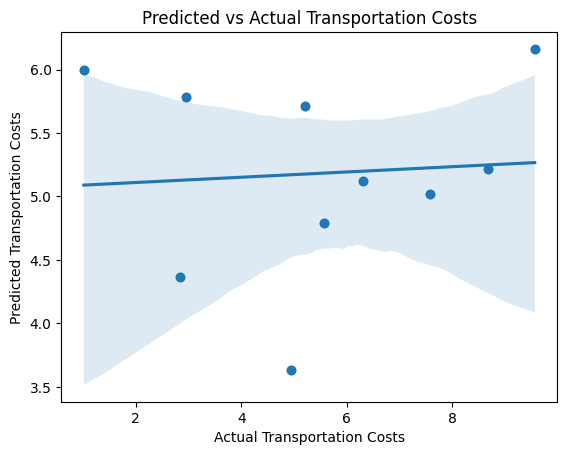

In [95]:
# Create a scatter plot with the actual Transportation Costs on the x-axis and the predicted Transportation Costs values on the y-axis
plt.scatter(y_test, y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Transportation Costs')
plt.ylabel('Predicted Transportation Costs')
plt.title('Predicted vs Actual Transportation Costs')
plt.show()

In [96]:
file_path = r'C:\Users\omgha\OneDrive\Documents\GitHub\SupplyChainManagement\ml\models\Transportation_cost_model.h5'
with open(file_path, 'wb') as f:
    pickle.dump(model, f)